### **생선 랜덤박스**
> 한 박스에 7개의 생선을 랜덤으로 담아서 판매할 때, 각 생선별 확률을 출력해야 한다.  

***7개중 한 개를 고르는 "분류"인가, 확률 수치를 구하는 "회귀"인가***

### **k-최근접 이웃**
> 주변이웃의 클래스 비율을 확률로 출력하여 확률을 구해보자

<div>
    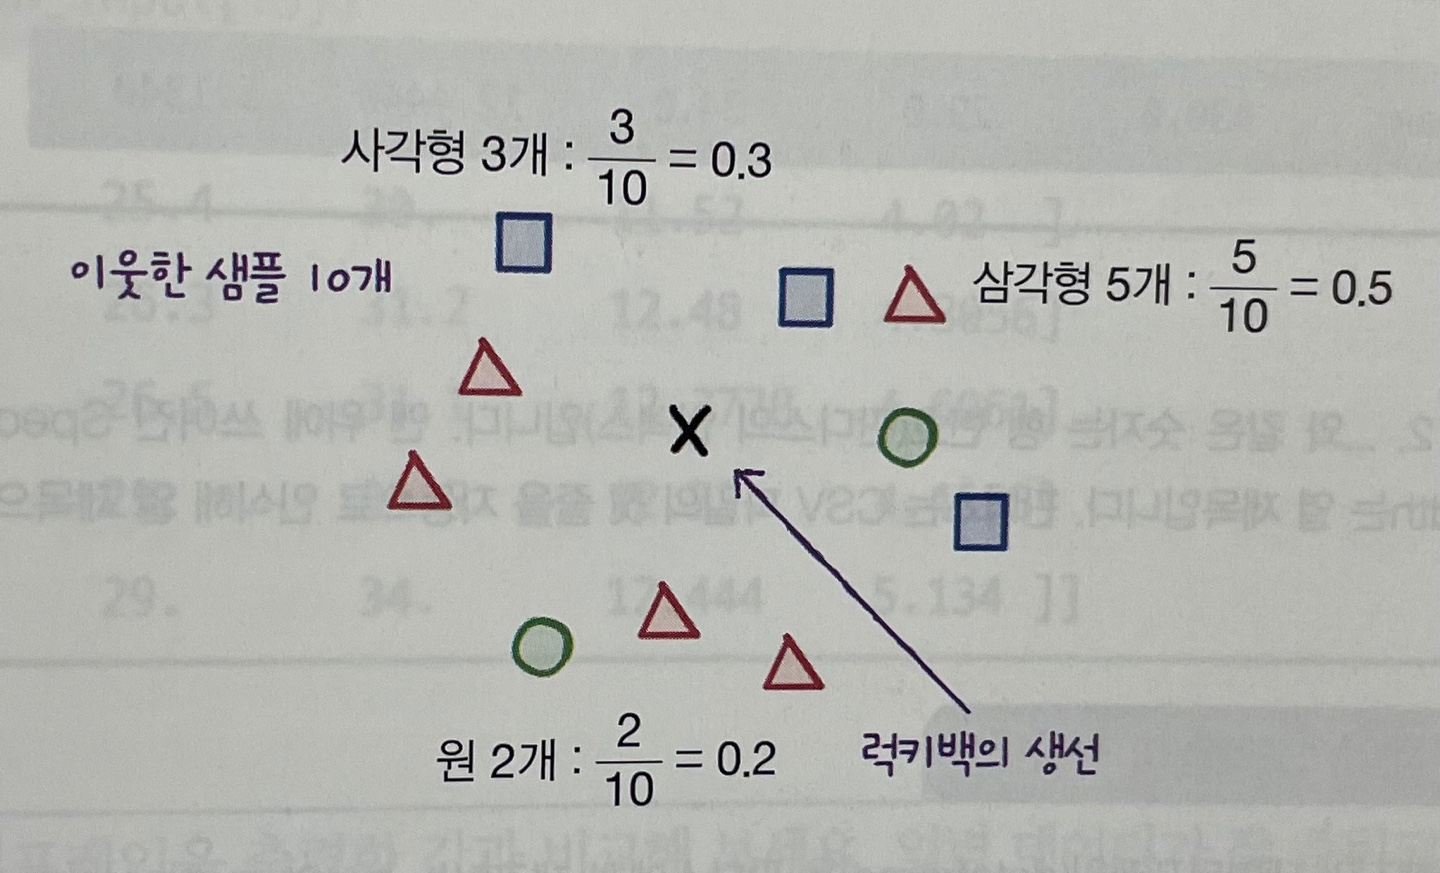
<div>

### **판다스로 CSV파일 가져오기**

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() #처음 5개의 행

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


### **가져온 데이터프레임에서 물고기 종류(Species)를 중복없이 가져오기**

In [2]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### **데이터프레임에서 Species를 제외한 5개의 열을 입력 데이터로 사용**

In [3]:
#데이터프레임에 컬럼명을 전달하면 전달한 컬럼의 데이터들만 분리하여 새로운 데이터 프레임을 만들어낸다.
#이를 numpy 배열로 변경한다(to_numpy())
fish_input = fish[['Weight',	'Length',	'Diagonal',	'Height',	'Width']].to_numpy()
print(fish_input[:5]) #처음 5개 행 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


### **훈련세트와 테스트세트로 분리**
*데이터 세트는 항상 2개가 필요하다*

In [4]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

### **표준화 전처리**

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### **k-최근접 이웃 분류기의 확률 예측**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

#확률이 목적이므로 점수에 대해서는 신경쓰지 않도록 한다.

0.8907563025210085
0.85


### **다중 분류(multi-class classification)**
> 타겟 데이터에 2개의 클래스를 분류하는 것을 이진 분류라 한다면,  
**2개 이상의 클래스를 분류하는 것**을 다중 분류라고 한다.  
> 이진 분류를 사용했을 때에는 양성과 음성 클래스 각각 1과 0으로 지정하였으나,  
다중 분류에서는 타겟값을 문자열로 사용할 수 있다.

In [10]:
#classes_속성에 타겟값이 저장되어 있으며, 자동으로 알파벳 순으로 정렬된다.
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


### **타겟값이 문자열일 경우 예측 결과도 문자열로 나온다.**

In [11]:
#처음 5개의 샘플의 타겟값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


### **proba() 메소드로 클래스별 확률값 구하기**

In [12]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=4)) #소수점 네번째 자리까지 표기, 다섯 번째에서 반올림

#4번째와 5번째 샘플의 클래스를 확인해보자.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [13]:
#슬라이싱을 하게 되면 하나의 샘플만 선택해도 항상 2차원배열이 만들어진다.
distances, indexes = kn.kneighbors(test_scaled[4:5])
print(train_target[indexes])

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

#근접한 이웃은 3개로 설정했기 때문에 3개 중 어떤 클래스인지에 대한 확률은 정확하다.
#Roach : 1/3 : 0.3333
#Perch : 2/3 : 0.6667

[['Perch' 'Perch' 'Roach']]
[['Roach' 'Perch' 'Perch']]


> *하지만 랜덤박스의 확률은 0/3, 1/3, 2/3, 3/3이 전부이므로 더 좋은 방법을 찾아야 할 것 같다.*

# **로지스틱 회귀(Logistic regression)**
>> 선형 회귀와 동일하게 선형 방정식을 학습한다.  

>> *z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f*  
- a, b, c, d는 가중치 혹은 계수이다. 특성이 늘어나더라도 선형 방정식과 같다.
- z는 어떠한 값도 가능하지만 확률이 되기 위해서는 0과 1사이의 값이 되어야 한다.  
- z가 작아질 수록 0에 가까워지고, z가 커질 수록 1에 가까워져야 한다.

### **시그모이드 함수(Sigmoid function) 또는 로지스틱 함수(Logistic function)**

<div>
    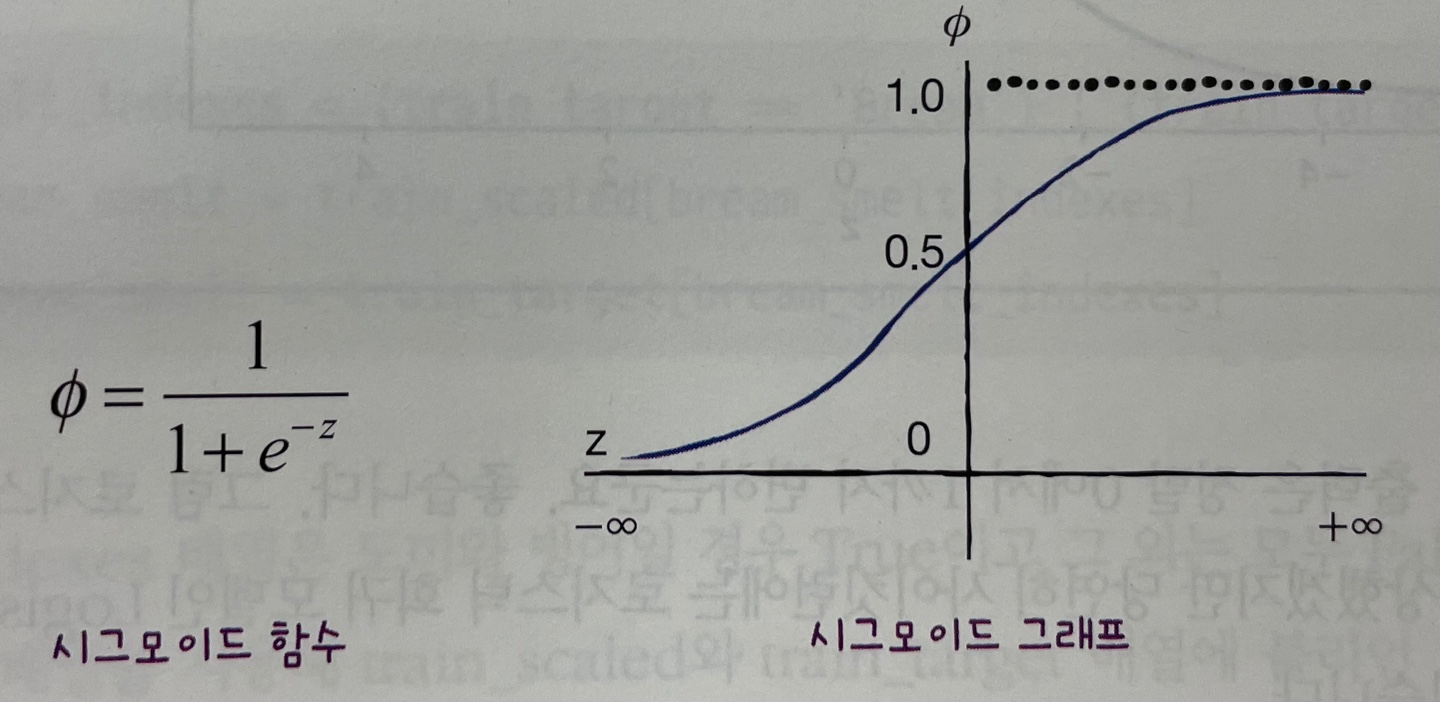
</div>

> z의 값이 0보다 크면 함수의 값은 0.5보다 크므로 양성으로 판단하고, 0.5이거나 보다 작으면 음성으로 판단한다.  
 출력값을 0과 1사이로 압축하기 위해서는 아래와 같은 함수가 필요하다.  

> *ф : 피(파이) 
## *ф = 1/1+e^-z*  
> 자연 상수인 e는 무리수인 상수로 2.71828182845904523536⋯ 이고 이 값에 한 없이 가까워 지는 상수이다.  
값이 정확히 0.5일 때 사이킷런에서는 음성 클래스(0)로 판단한다

In [15]:
print(np.exp(1)) #e^1

2.718281828459045


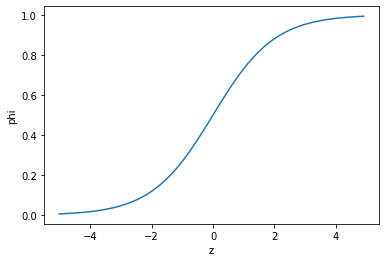

In [16]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5~5사이에 0.1간격으로 배열 z 생성
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### **도미와 빙어 이진 분류**
> 먼저 Bream, Smelt 두 개의 샘플에 대한 확률을 구해보자.

### **불리언 인덱싱(Boolean indexing)**
> 넘파이 배열에 True, False를 전달하여 행을 선택할 수 있으며, True가 전달된 행만 추출된다.

In [17]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])
print(char_arr == 'A')
print(char_arr == 'C')
print((char_arr == 'A') | (char_arr == 'C')) # 비트 연산(OR, 논리합)으로 결과 출력

['A' 'C']
[ True False False False False]
[False False  True False False]
[ True False  True False False]


In [18]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes] #표준화된 훈련데이터에서 도미와 빙어만 불리언 인덱싱
target_bream_smelt = train_target[bream_smelt_indexes] #표준화된 테스트데이터에서 도미와 빙어만 불리언 인덱싱

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [20]:
train_input[bream_smelt_indexes][:5] #2번째 샘플만 빙어이다.

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [620.    ,  34.5   ,  39.7   ,  15.5227,   5.2801],
       [500.    ,  31.    ,  36.2   ,  14.3714,   4.8146],
       [714.    ,  36.    ,  41.5   ,  16.517 ,   5.8515]])

### **proba()를 사용하여 처음 5개 샘플의 예측 확률 구하기**

In [21]:
print(lr.predict_proba(train_bream_smelt)[:5])

#시그모이드 함수를 통해 0.5보다 크면 양성, 0.5이거나 작으면 음성으로 판단한다.
#첫번째 열은 음성 클래스(0)에 대한 확률
#두번째 열은 양성 클래스(1)에 대한 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


### **어떤 클래스가 양성일까?**
*예측 대상이 양성이다*
> 사이킷런에서 타깃값은 알파벳순으로 정렬된다.  
따라서 Bream, Smelt 순서이므로 Bream은 음성, Smelt가 양성이 된다.

In [24]:
print(lr.classes_)

['Bream' 'Smelt']


* *해결방법 1*

In [27]:
target_bream_smelt_encode = []
bream_smelt_dict = {'Bream' : 1, 'Smelt' : 0}
for i in target_bream_smelt:
  target_bream_smelt_encode.append(bream_smelt_dict[i])
#target_bream_smelt_encode

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt_encode)
print(lr.predict(train_bream_smelt[:5]))

[1 0 1 1 1]


In [28]:
print(lr.predict_proba(train_bream_smelt)[:5])

[[0.00240145 0.99759855]
 [0.97264817 0.02735183]
 [0.00513928 0.99486072]
 [0.01415798 0.98584202]
 [0.00232731 0.99767269]]


* *해결방법 2*

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(target_bream_smelt)
target_bream_smelt_encode = []
temp = encoder.transform(target_bream_smelt)

for i in temp:
  target_bream_smelt_encode.append(int(not i))

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt_encode)
print(lr.predict(train_bream_smelt[:5]))

[1 0 1 1 1]


In [32]:
print(lr.predict_proba(train_bream_smelt)[:5])

[[0.00240145 0.99759855]
 [0.97264817 0.02735183]
 [0.00513928 0.99486072]
 [0.01415798 0.98584202]
 [0.00232731 0.99767269]]


### **이진 분류에서의 계수와 절편**

In [33]:
print(lr.coef_.shape, lr.intercept_.shape)

#5개의 특성을 사용했으며, z는 1개를 계산하였다.

(1, 5) (1,)


### **전체 생선 다중 분류**
> 7개의 생선을 분류할 때 LogisticRegression 모델의 훈련 반복횟수를 1000으로 설정한다.  
릿지 회귀와 같이 계수의 제곱을 규제(L2 규제)하기 때문에 규제의 양을 조절할 수 있으며  
C라는 매개변수로 전달한다.  
릿지에서의 alpha와 반대로 C는 작을 수록 규제가 커지며, C의 기본값은 1이다.  
규제를 완화하기 위해서 20으로 늘린 후 분류를 수행한다.

In [34]:
lr = LogisticRegression(C=20, max_iter=1000) #규제를 20으로 완화, 훈련 반복 횟수를 1000으로 증가
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


### **처음 5개 행 예측**

In [35]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


### **샘플 5개에 대한 예측 확률**
> 네 번째 자리에서 반올림한다.

In [36]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(np.round(proba, decimals=3).shape)
#5개에 대한 예측이기 때문에 5개 행이 출력된다.
#7개의 생선에 대한 확률이기 때문에 7개 열이 출력된다.

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
(5, 7)


### **확률에 대한 클래스 정보 확인**

In [37]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


### **다중 분류에서의 계수와 절편**

In [38]:
print(lr.coef_.shape, lr.intercept_.shape)

#5개의 특성을 사용했으며, z는 7개나 계산하였다.

(7, 5) (7,)


### **소프트맥스(softmax) 함수**
>> 이진 분류에서는 시그모이드 함수를 통해 하나의 선형 방정식 출력값을 0~1로 출력한다.  
>> 하지만 다중 분류에서는 클래스마다 z값을 하나씩 계산한 후 가장 높은 z값을 출력한다.  
>> 이 처럼 다중 분류에서는 시그모이드 함수가 아닌 소프트맥스 함수를 사용하여 3개 이상의 z값을 확률로 변환한다.  


---

**7개의 z1 ~ z7이 있다면 지수함수 e^z1 ~ e^z7을 계산하여 모두 더한다.**  
- *e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7*  

**e^z1 ~ e^z7을 각각 e_sum으로 나눈다.**  
- *s1 = e^z1/e_sum*
- *s2 = e^z2/e_sum*
- ...
- *s7 = e^z7/e_sum*

**s1 ~ s7의 전체 합은 1이므로 7개의 생선에 대한 확률의 합이 1이 된다.**
- s1 + s2 + s3 + s4 + s5 + s6 + s7 = 1

### **z값 구하기 - decision_function()**

In [39]:
decision = lr.decision_function(test_scaled[:5]) #처음 5개 샘플에 대한 z1 ~ z7의 값을 구한다.
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


### **소프트맥스 함수를 통해 각 샘플에 대한 소프트맥스를 구한다.**

In [41]:
from scipy.special import softmax
#axis를 지정하지 않으면 배열 전체에 대한 소프트맥스를 계산한다, 1로 설정하여 행(각 샘플)에 대한 소프트맥스를 계산한다.
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

#predict_proba()함수와 동일한 확률 결과를 확인할 수 있다.

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
